In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

%config InlineBackend.figure_format ='retina' 

### Задание.

Сгенерируйте выборку $X_1, ..., X_N$ из стандартного нормального распределения для
$N = 10^4.$ Для всех $n\leq N$ посчитайте по ней эмпирическую
функцию распределения. Для некоторых $n$ (например, $n \in \{10, 25,
50, 100, 1000, N\}$) постройте графики эмпирической функции
распределения (отметьте на оси абсцисс точки "скачков" кривых,
нанеся каждую из "подвыборок" на ось абсцисс на каждом
соответствующем графике с коэффициентом прозрачности 0.2), нанеся на
каждый из них истинную функцию распределения (количество графиков
равно количеству различныз значений $n$). 

Будет полезно: https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html

### Решение

1. Генерация выборки размером $N = 10^4.$

In [2]:
from scipy.stats import norm

In [3]:
N = 10000
X = norm.rvs(loc=0, scale=1, size=N)

2. Построение эмпирической функции распределения для любого $n\leq N$.

Можно протестировать два варианта: делать подвыборку из уже сгенерированной $X$, либо создавать выборки меньшего размера из стандартного нормального распределения. В первом случае пригодится функция **np.random.choice**, во втором – **norm.rvs**.

Эмпирическая функция распределения задаётся следующим образом:
$\hat F\left(x\right)=\frac{1}{n}\sum\limits_{i=1}^n\theta\left(x-X_i\right)$ , где $n$ – размер выборки, $X_i$ – $i-$ый элемент выборки, $\theta$ - функция Хевисайда.   

In [4]:
def ecdf_visualisation(X: np.ndarray, n: int, random_choice: bool = False) -> None:
    
    # Параметр random_choice задаёт, используем ли мы для генерации подвыборки исходную выборку
    # или формируем подвыборки из стандартного нормального распределения
    if random_choice:
        x = np.random.choice(X, n)
    else:
        x = norm.rvs(loc=0, scale=1, size=n)
        
    # Расчёт значения эмпирической функции распределения
    F = np.array([])
    for i in np.nditer(x):
        F = np.append(F, np.sum(np.heaviside(i - x, 1)) / n)
        
    # Поскольку функция распределения является возрастающей, то подвыборку и значения F можно без опасений отсортировать
    # для последующего корректного отображения ступенчатого графика
    x = np.sort(x)
    F = np.sort(F)
    
    # Зададим размер графика
    plt.figure(figsize=(14,8))
    # Нанесем подвыборку на ось абсцисс с коэффициентом прозрачности 0.2
    plt.scatter(x, np.zeros_like(x), alpha=0.2, c='xkcd:red')
    # Построим эмпирическую функцию распределения
    color = 'xkcd:tomato'
    plt.step(x, F, c=color, where='post')
    plt.step([x[0], x[0]], [0, F[0]], c=color, where='post')
    # Добавим горизонтальные линии на уровне нуля и единицы
    plt.hlines(y=0, xmin=x[0], xmax=min(X), linewidth=1.3, color=color)
    plt.hlines(y=1, xmin=x[-1], xmax=max(X), linewidth=1.3, color=color)
    # Построим теоретическую функцию нормального распределения
    plt.scatter(X, st.norm.cdf(X, scale=1), s=0.5, c='xkcd:black')
    # Добавим сетку
    plt.grid()
   
    print('Размер выборки:', n)
    plt.show()

Размер выборки: 10


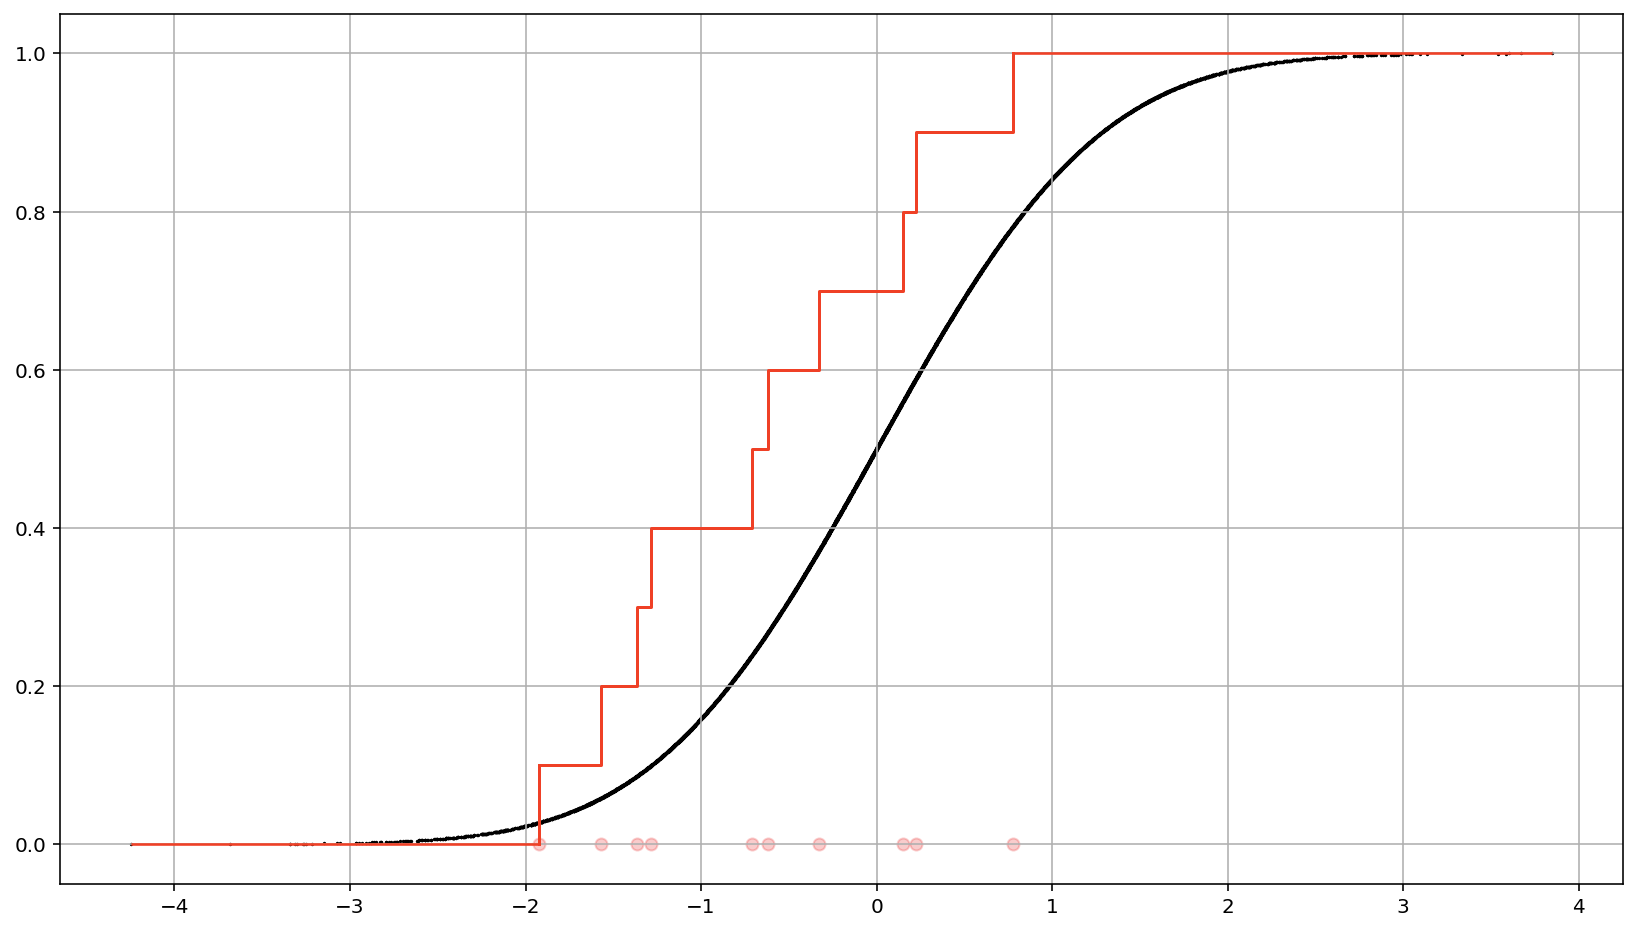

Размер выборки: 25


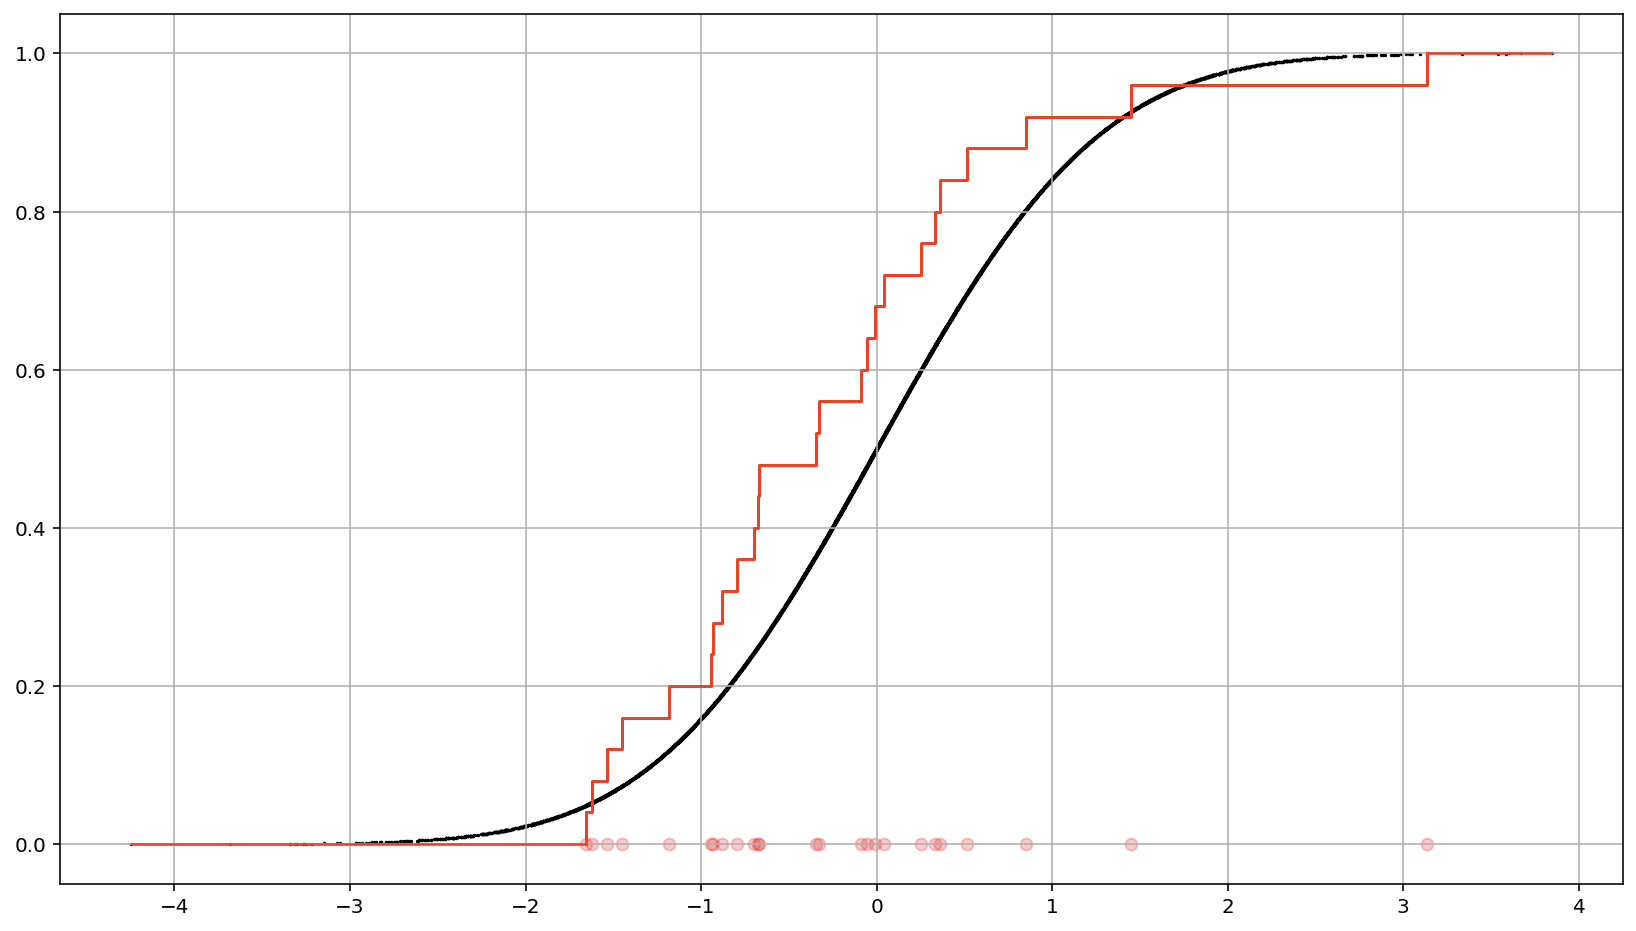

Размер выборки: 50


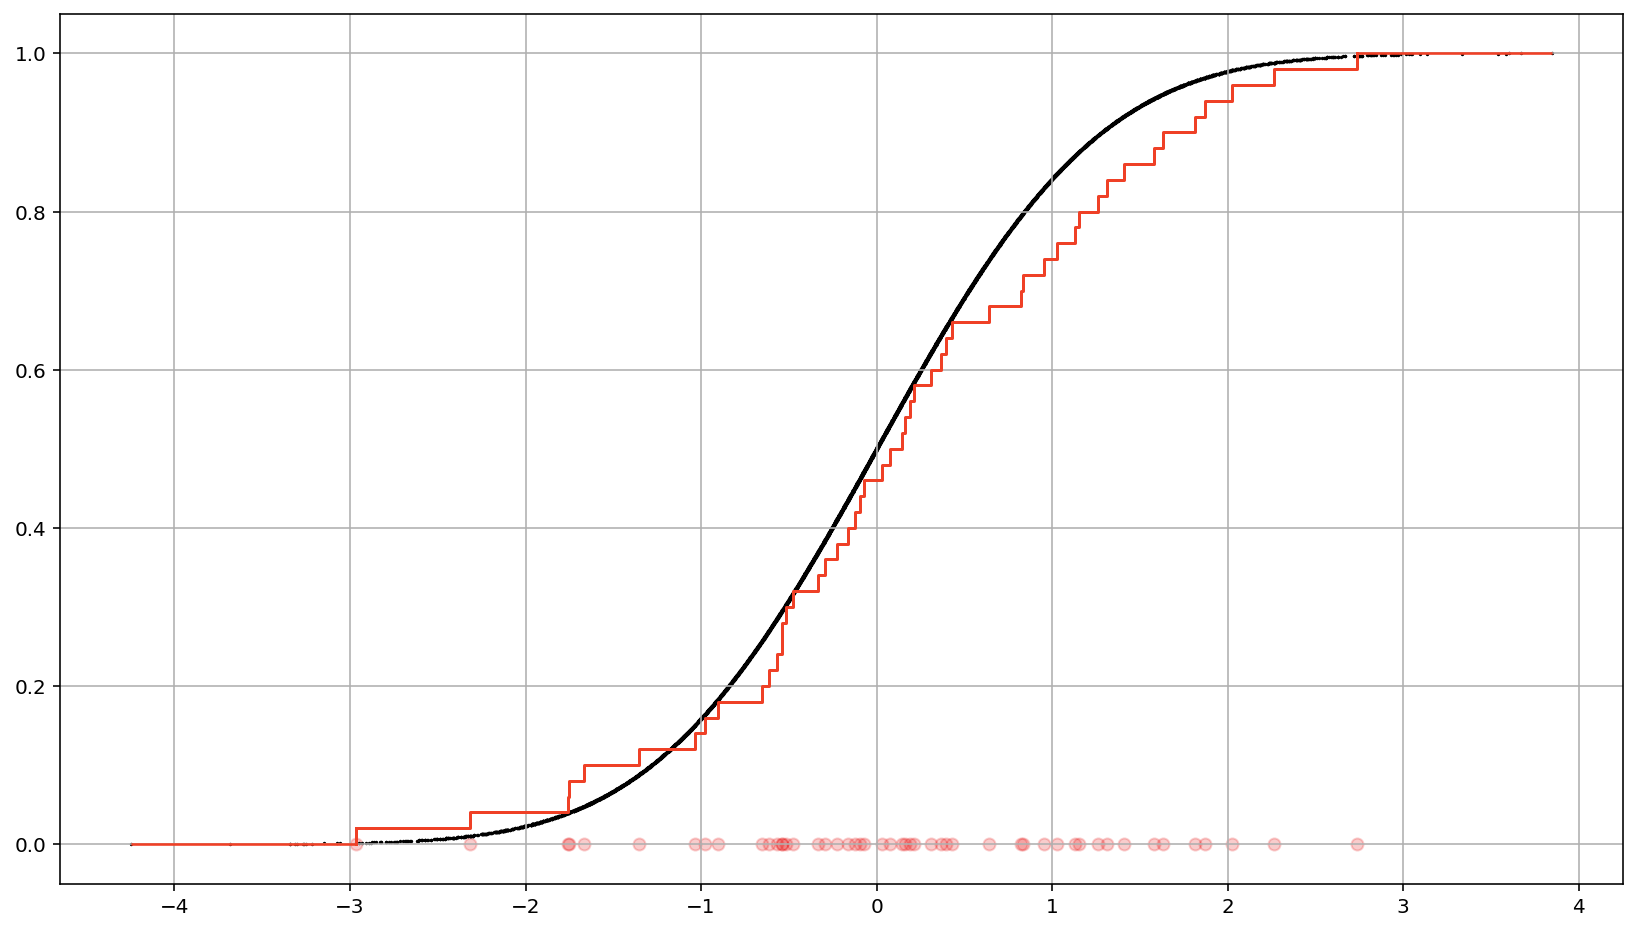

Размер выборки: 100


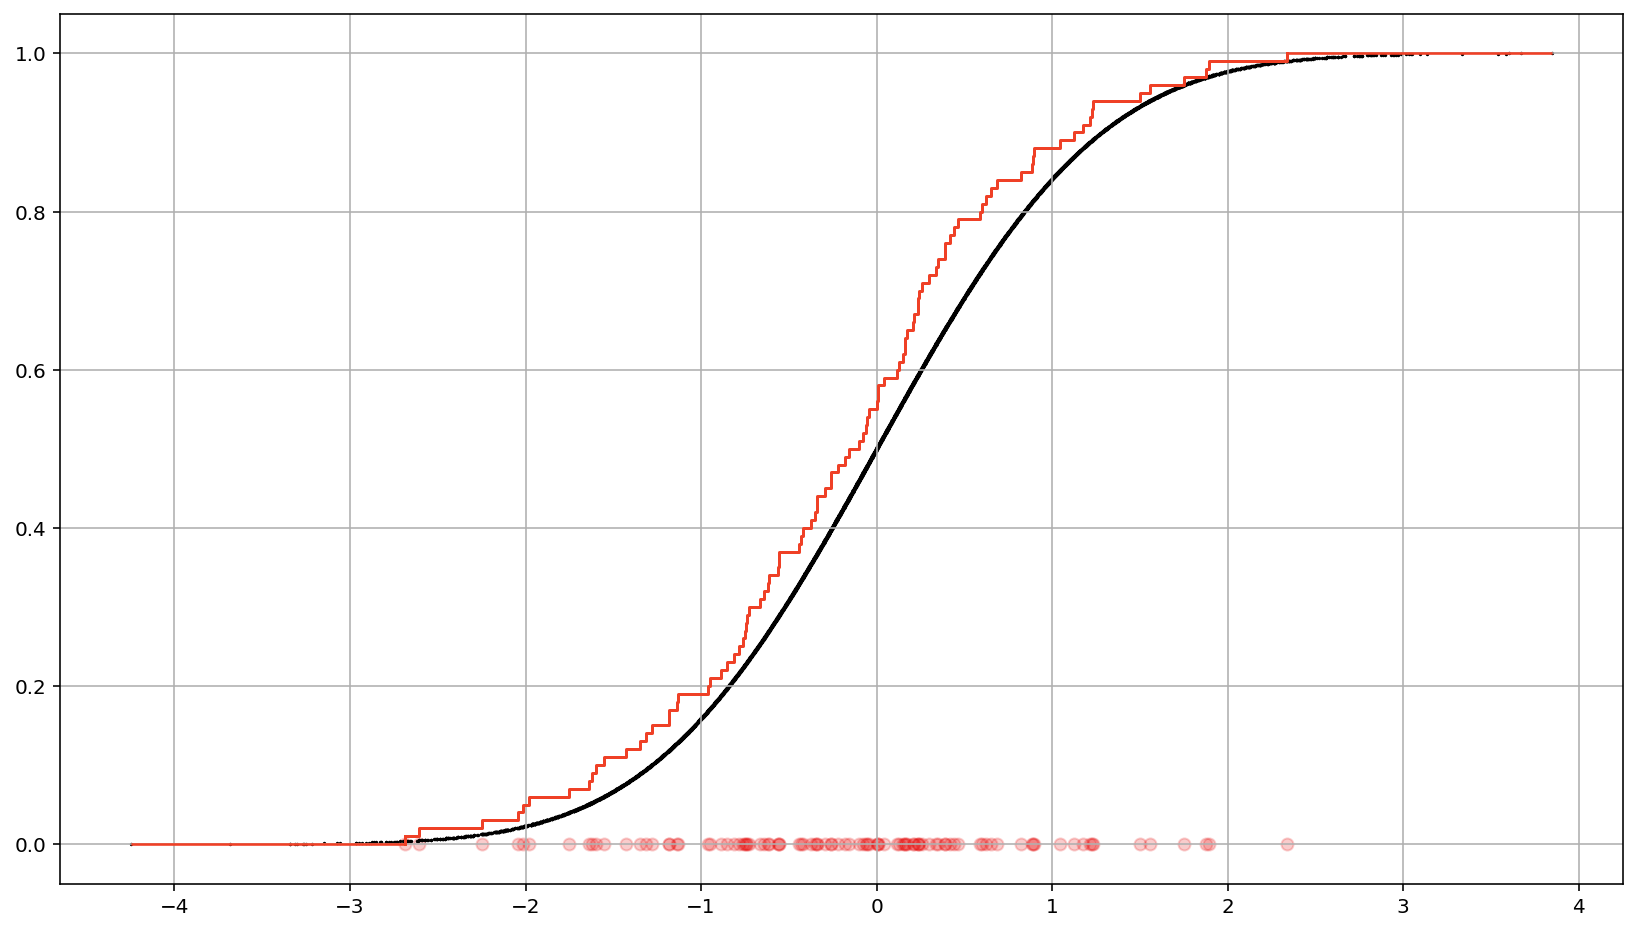

Размер выборки: 1000


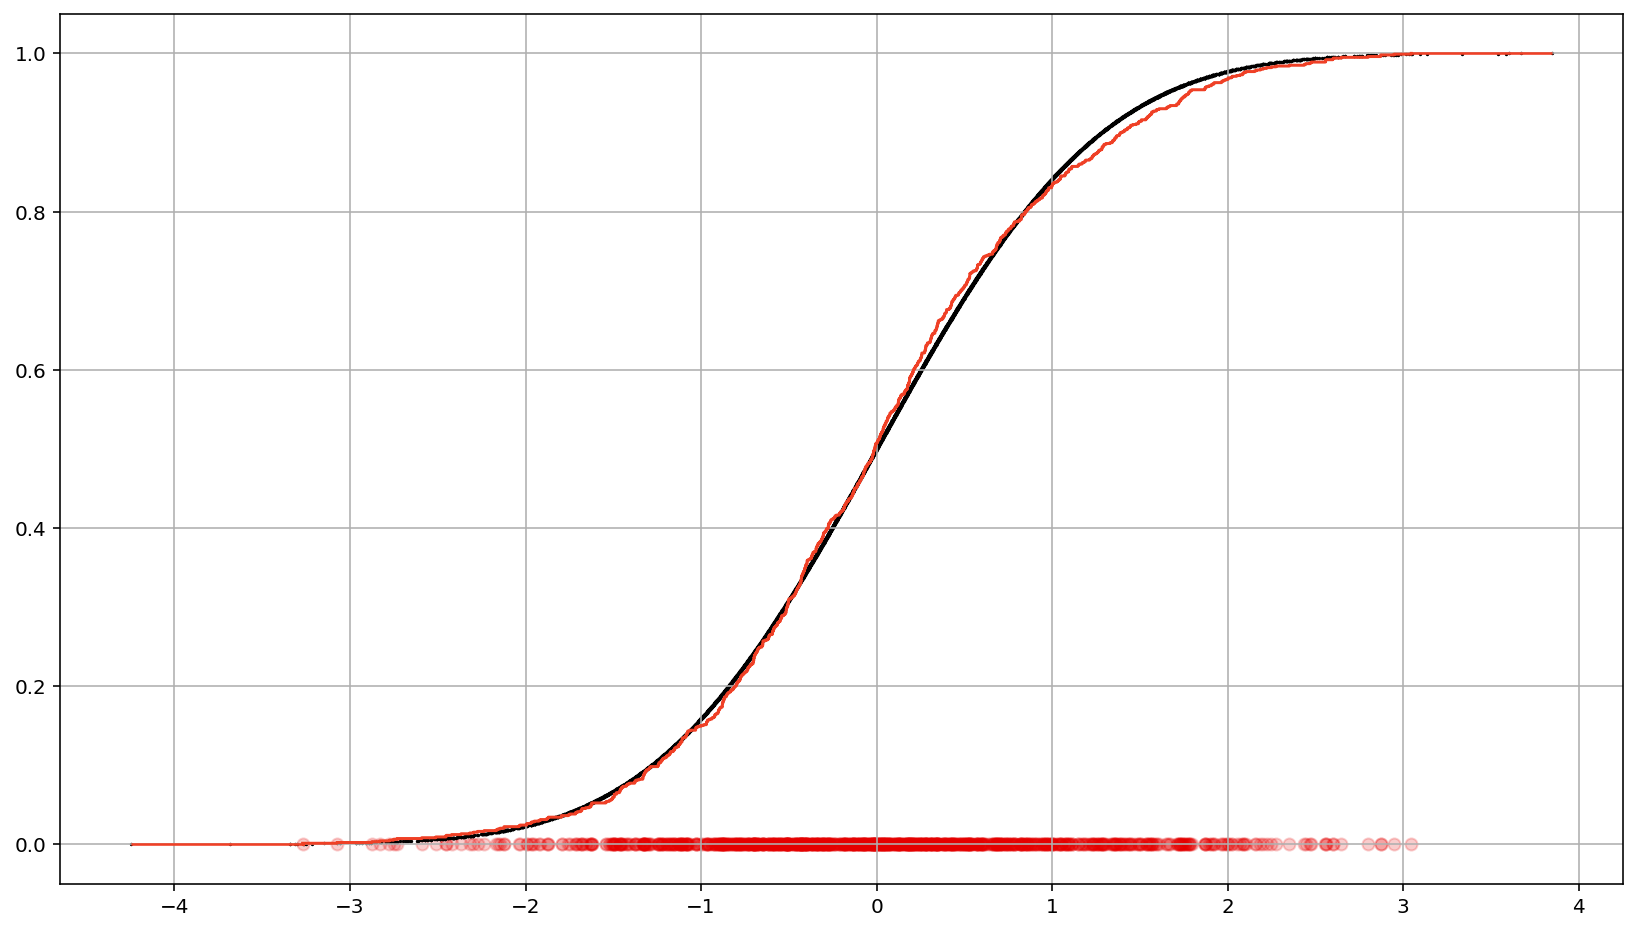

Размер выборки: 10000


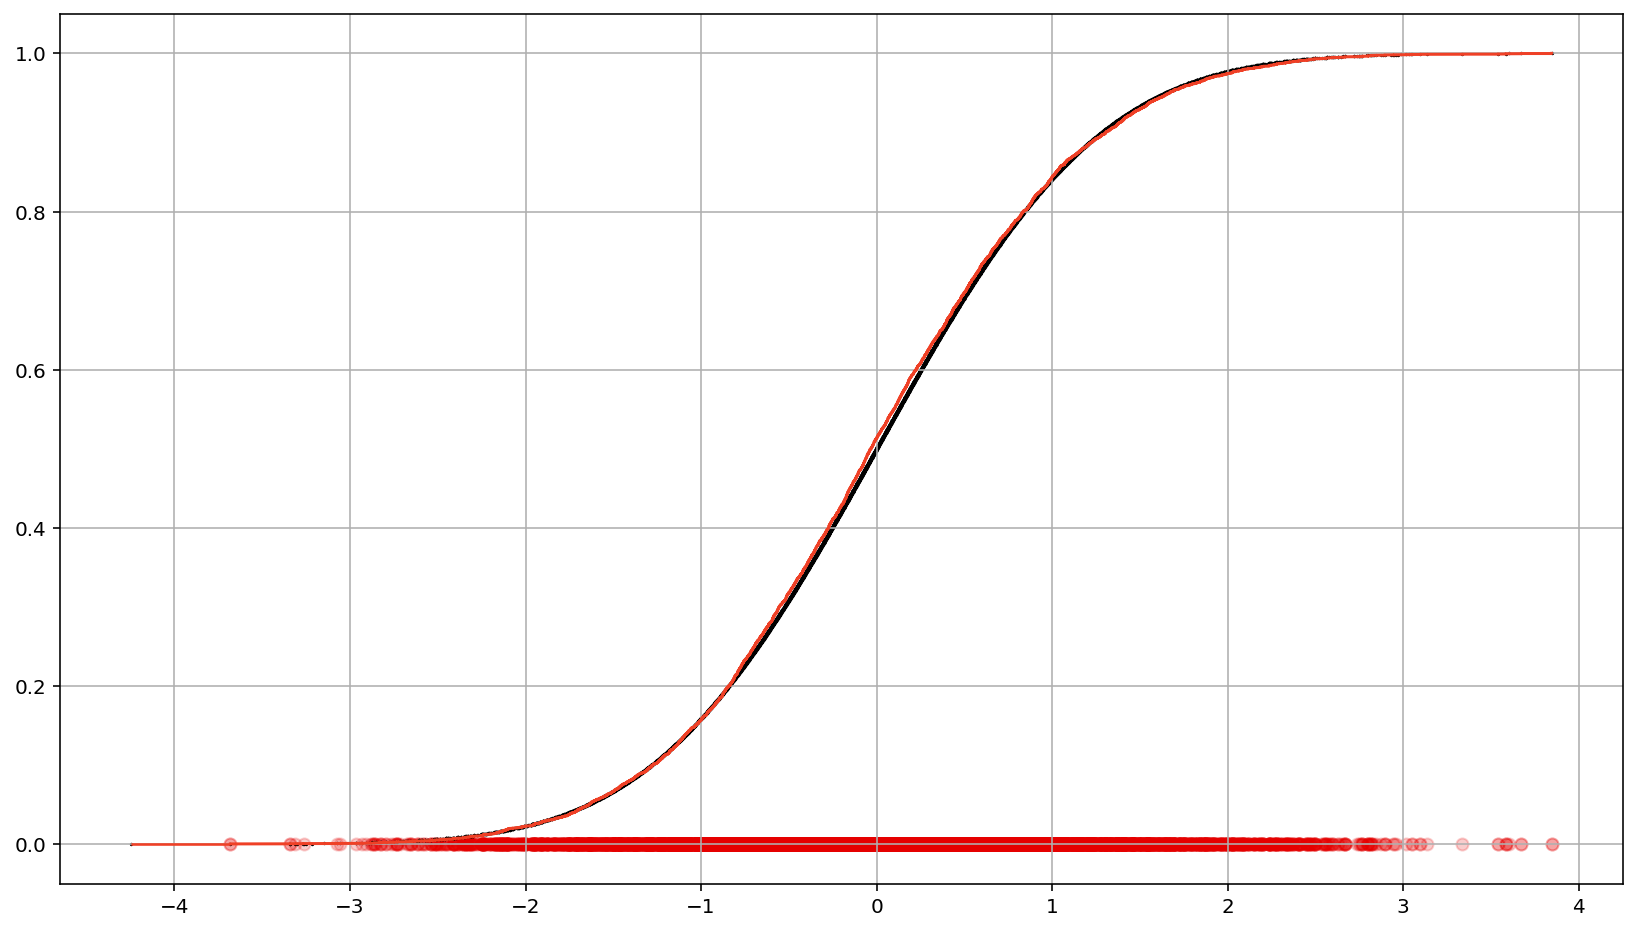

In [6]:
ecdf_visualisation(X=X, n=10, random_choice=True)
ecdf_visualisation(X=X, n=25, random_choice=True)
ecdf_visualisation(X=X, n=50, random_choice=True)
ecdf_visualisation(X=X, n=100, random_choice=True)
ecdf_visualisation(X=X, n=1000, random_choice=True)
ecdf_visualisation(X=X, n=N, random_choice=True)

Размер выборки: 10


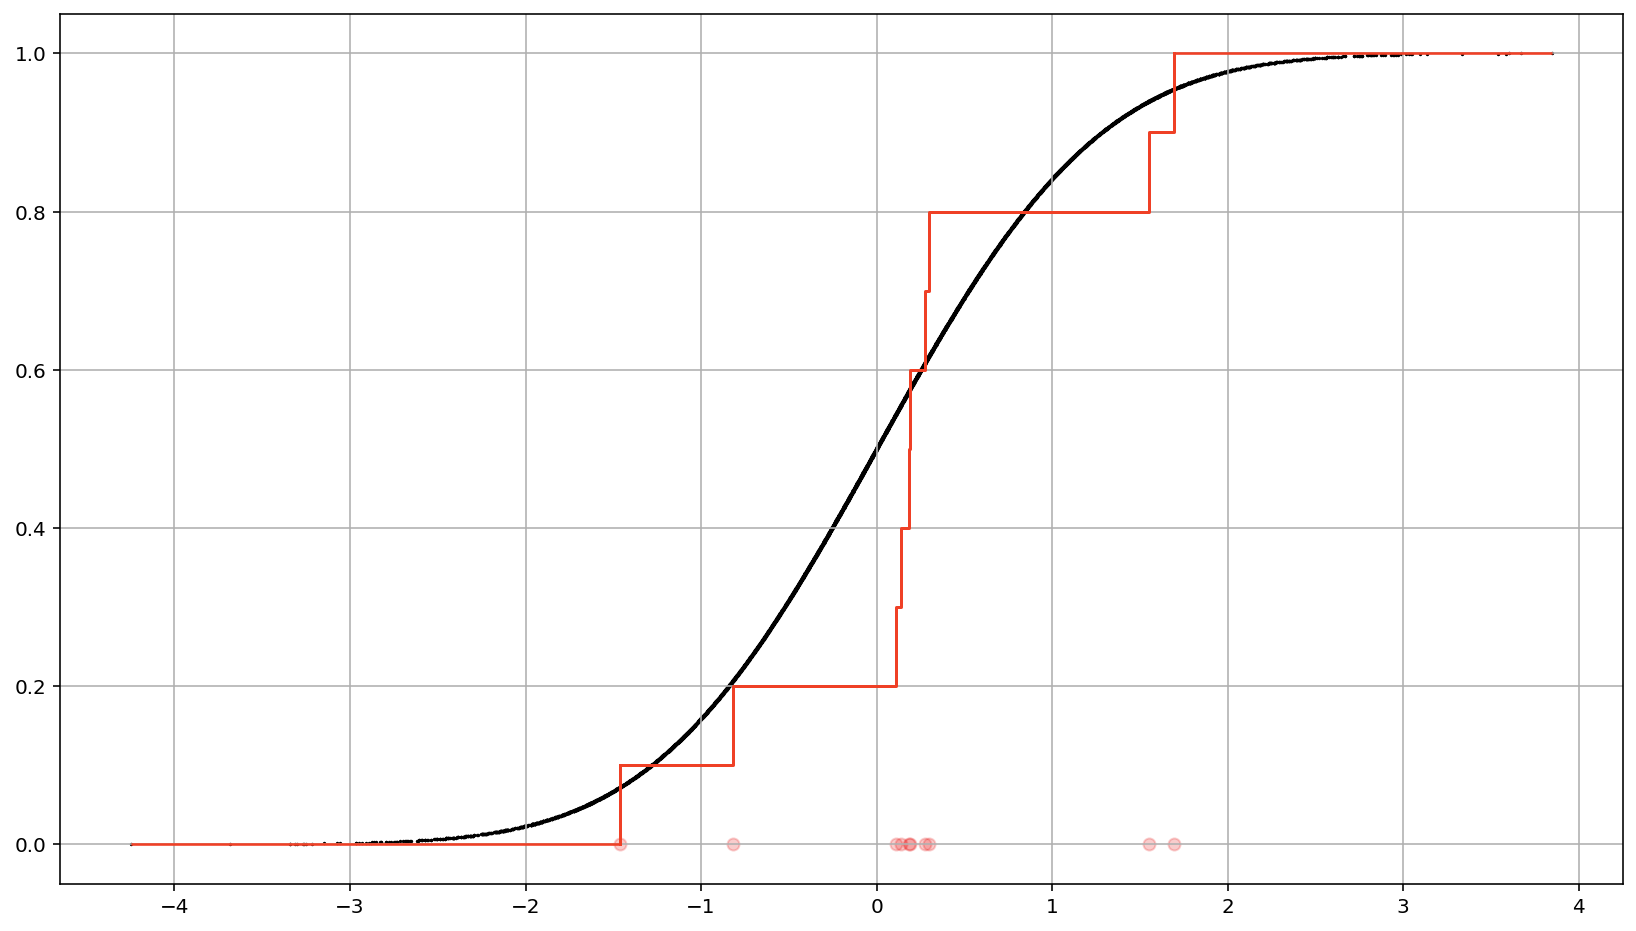

Размер выборки: 25


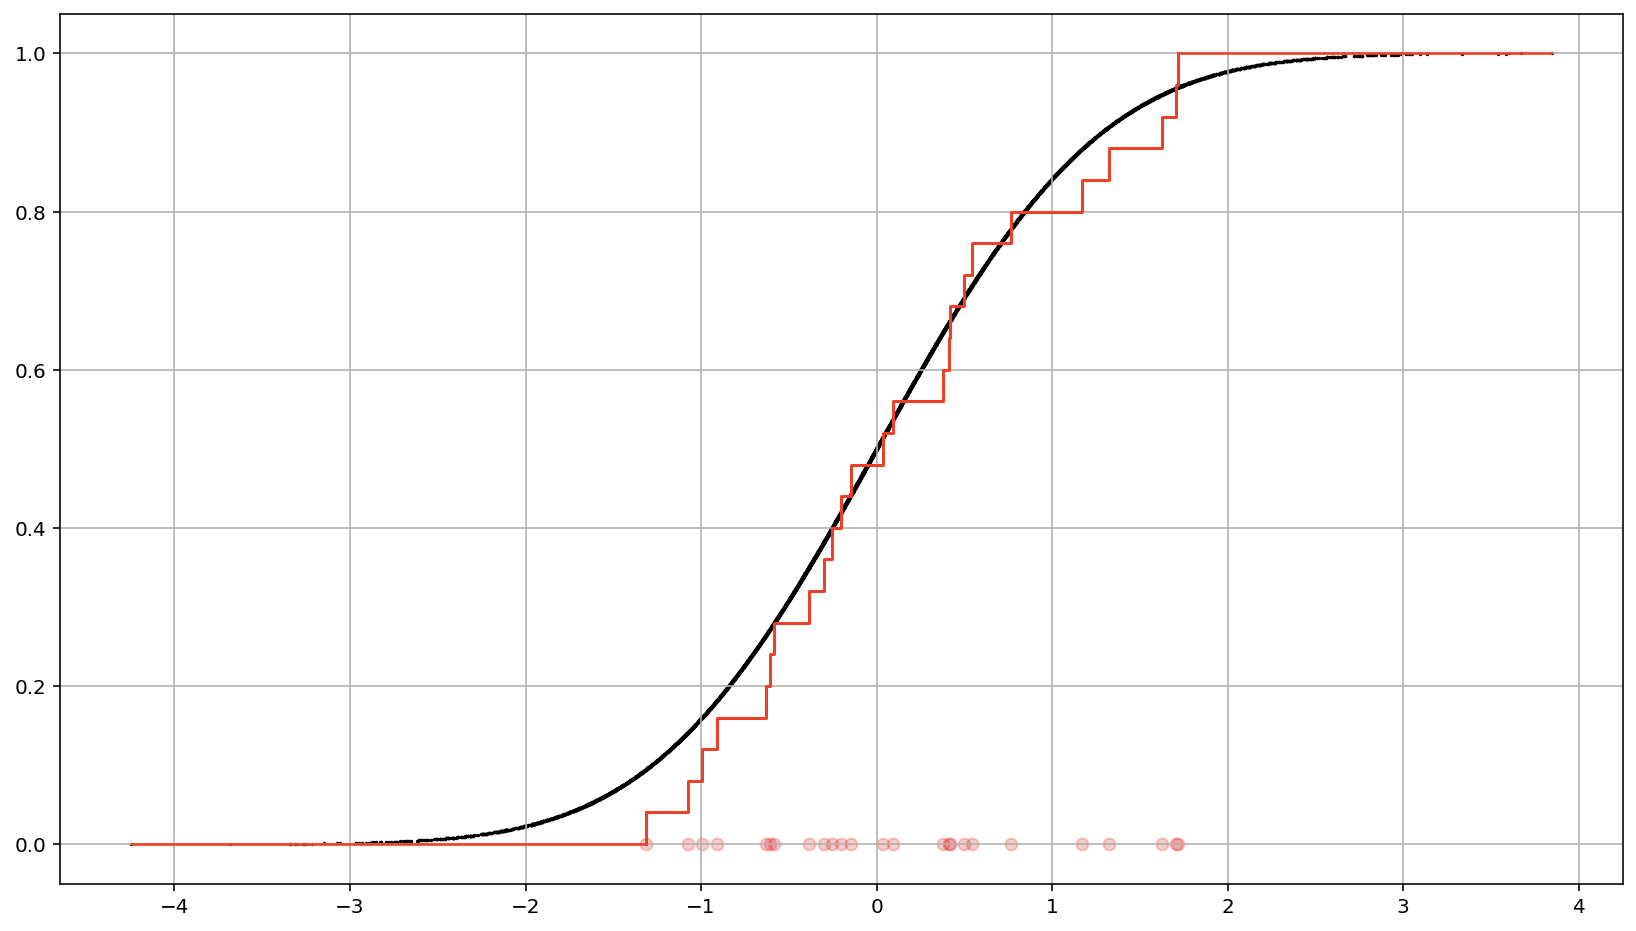

Размер выборки: 50


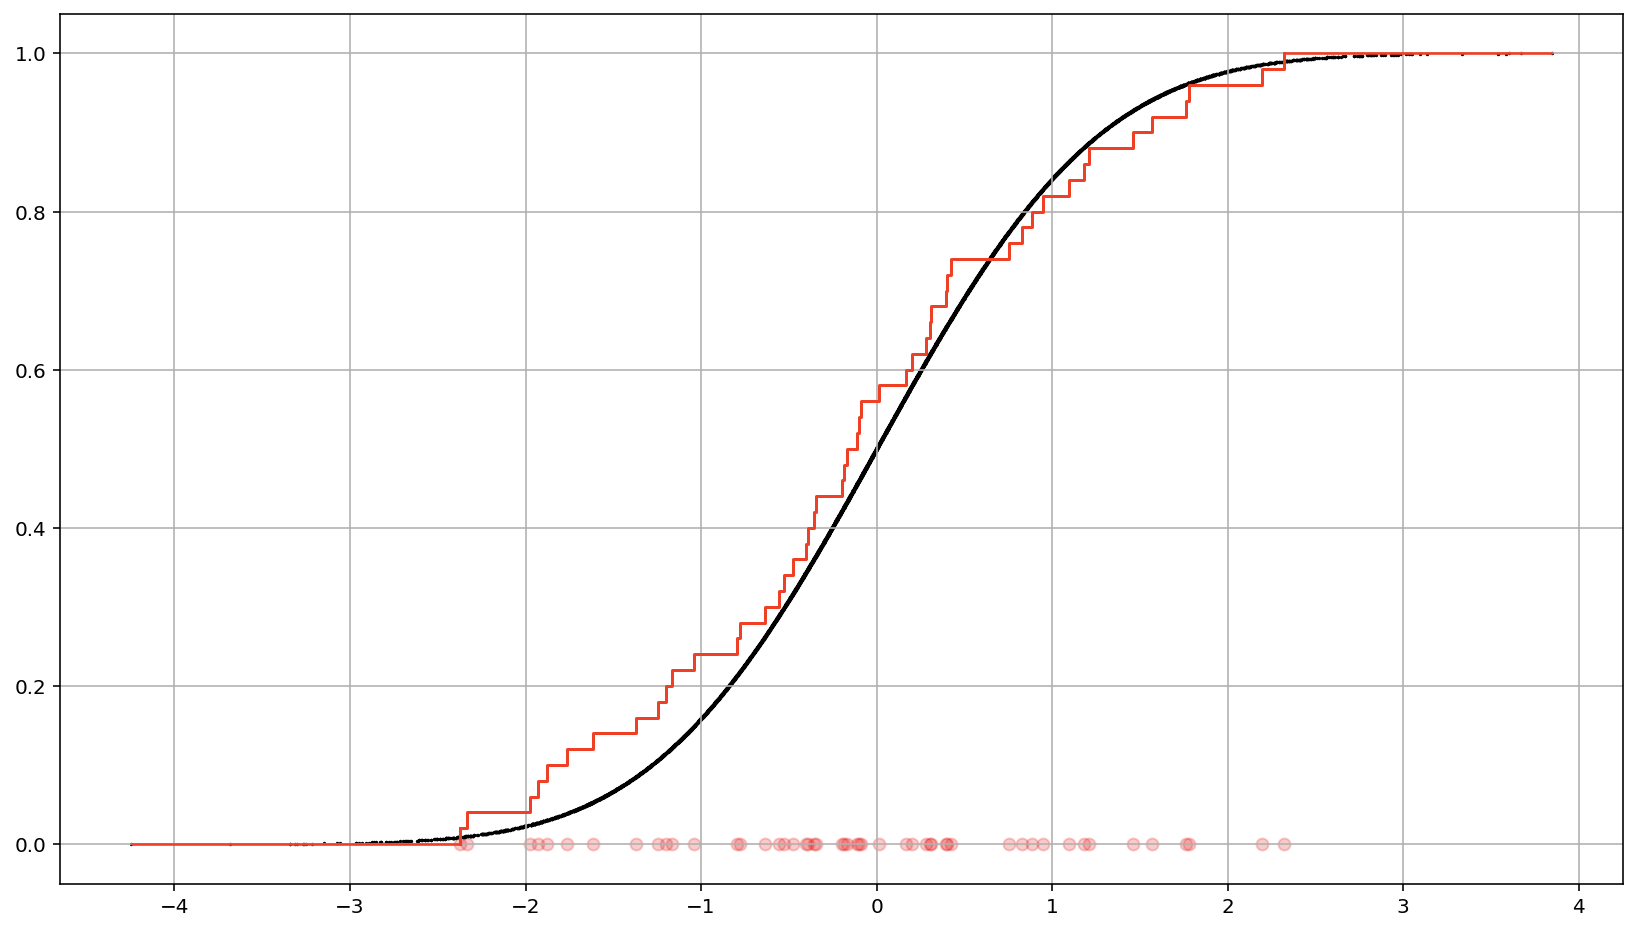

Размер выборки: 100


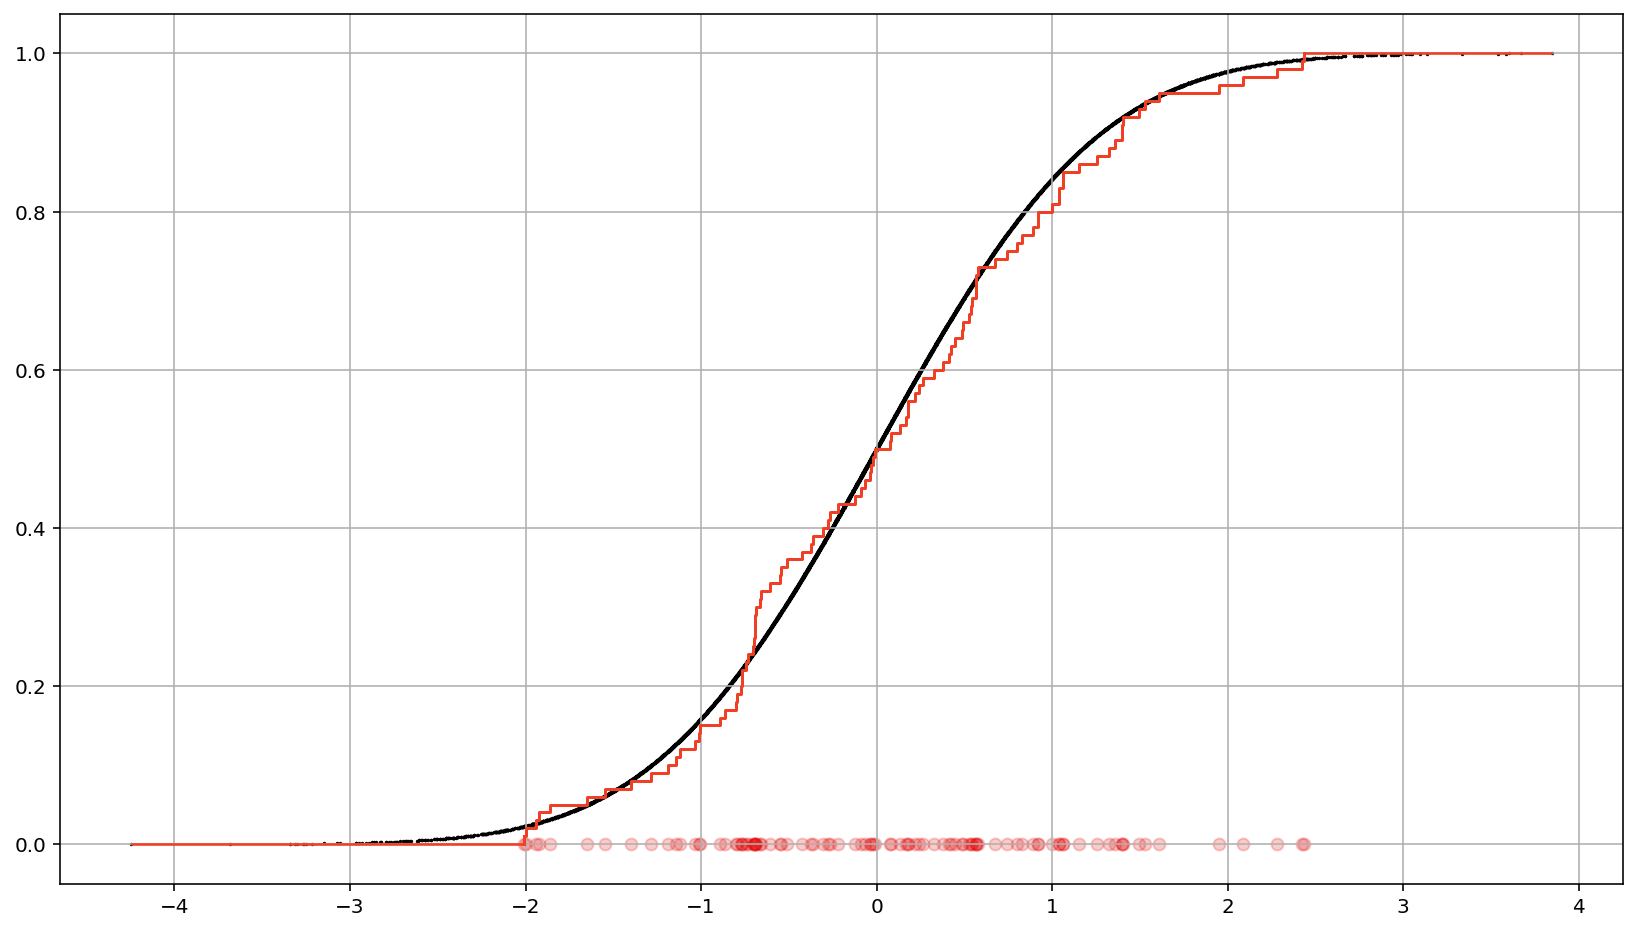

Размер выборки: 1000


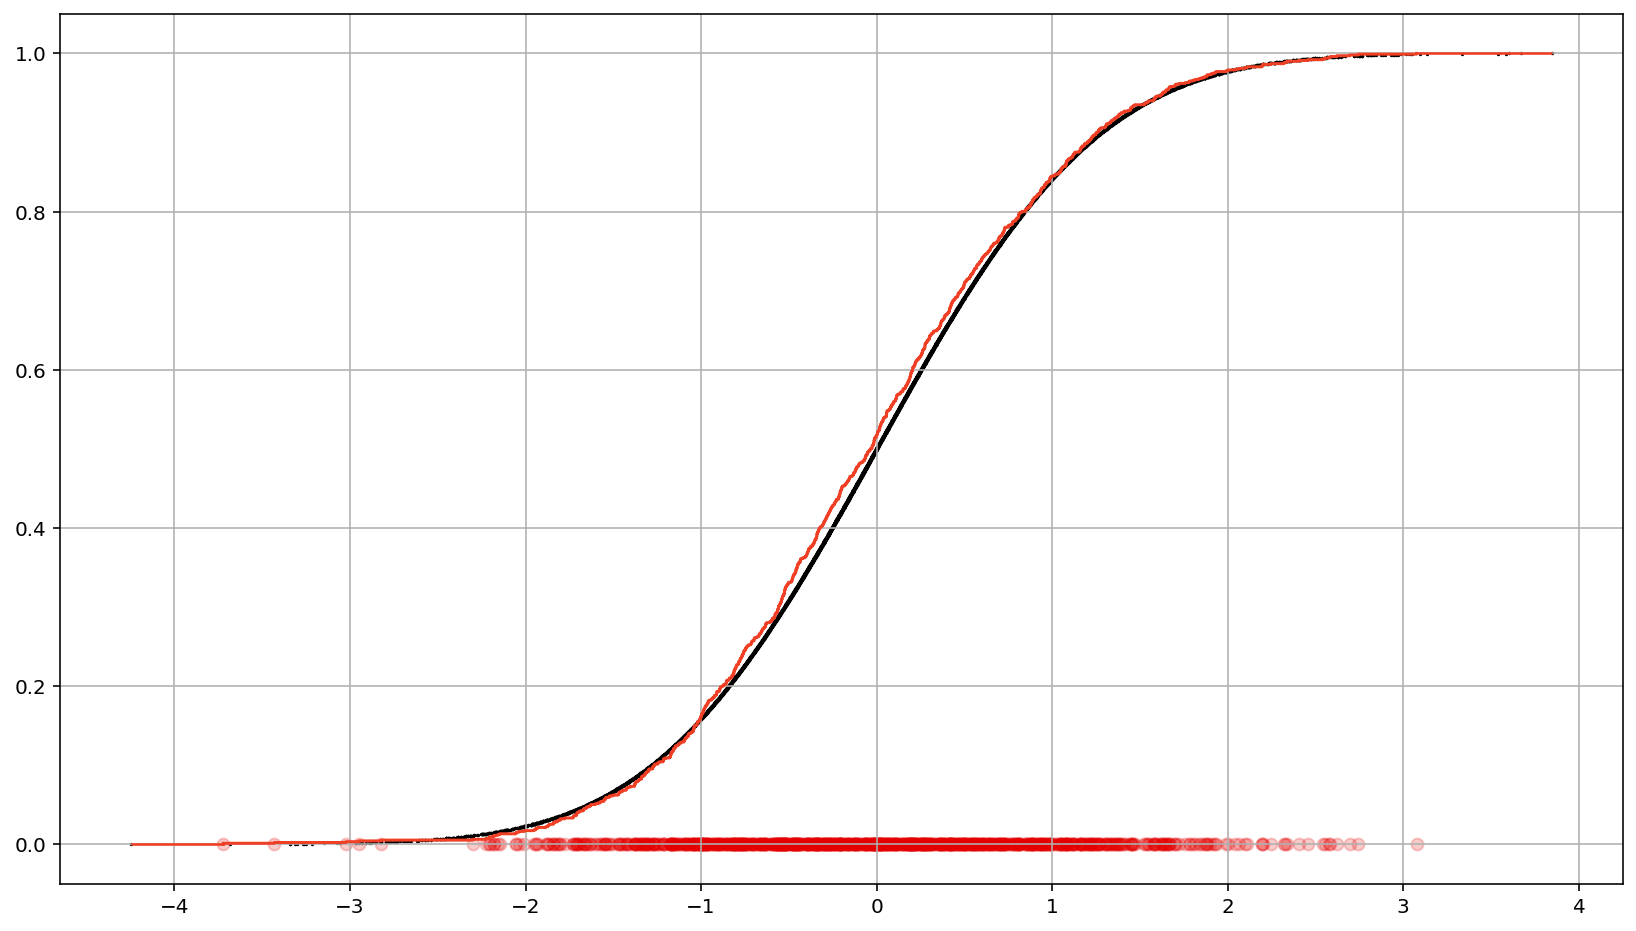

Размер выборки: 10000


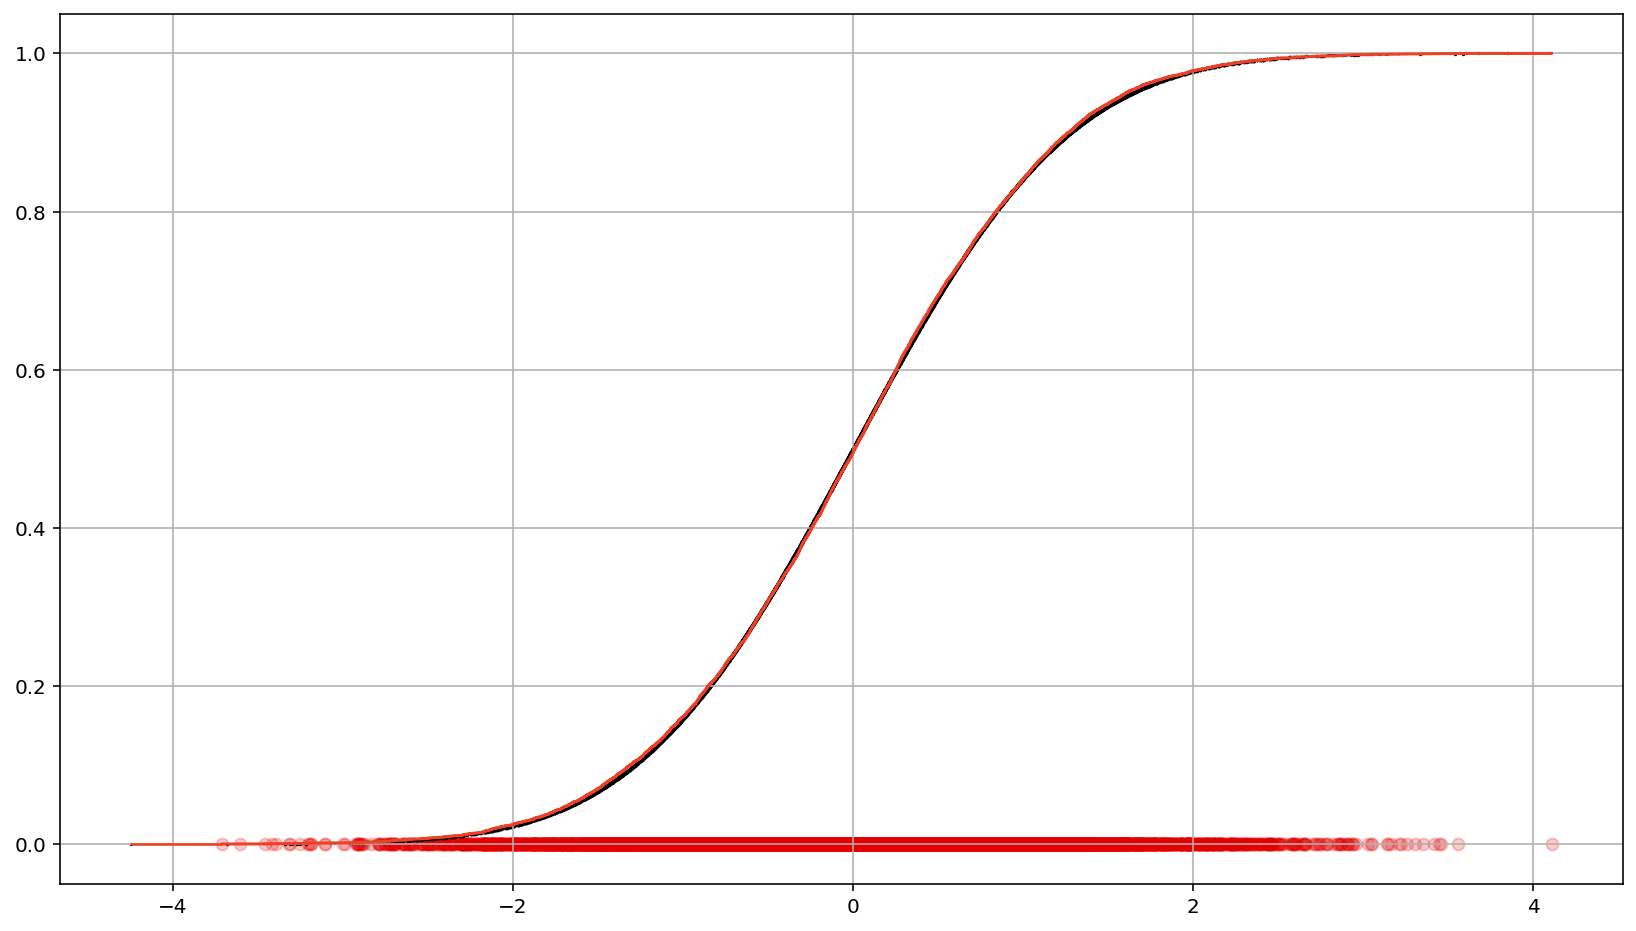

In [5]:
ecdf_visualisation(X=X, n=10, random_choice=False)
ecdf_visualisation(X=X, n=25, random_choice=False)
ecdf_visualisation(X=X, n=50, random_choice=False)
ecdf_visualisation(X=X, n=100, random_choice=False)
ecdf_visualisation(X=X, n=1000, random_choice=False)
ecdf_visualisation(X=X, n=N, random_choice=False)